In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('mnistALL.mat')
%matplotlib inline

In [3]:
mat.keys()


dict_keys(['mnist', '__globals__', '__header__', '__version__'])

In [4]:
data = mat['mnist']
train_images = data[0][0][0]
train_labels = data[0][0][2]
test_images = data[0][0][1]
test_labels = data[0][0][3]

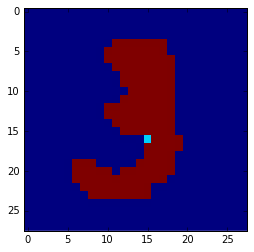

In [5]:
fig = plt.figure()
im = plt.imshow(train_images[:,:,10], vmin = 0.5, vmax=2, interpolation = 'none')
plt.show()

In [6]:
data_file = scipy.io.loadmat('mnist_all.mat') # load mnist_all.mat (if in same folder.!)
X3 = np.transpose(data_file['train3']) # fetch and transpose training 3's
X7 = np.transpose(data_file['train7'])
n = int(np.size(X3, 0)) # number of pixels
x3 = np.float32(X3) / -256.0 # go to float between 0 and 1, multiply 3s by -1
x7 = np.float32(X7) / 256.0
x3 = np.vstack([x3, np.squeeze(-1 * np.ones((np.size(x3, 1), 1)))]) # add label as n+1-th dimension
x7 = np.vstack([x7, np.squeeze(np.ones((np.size(x7, 1), 1)))])
x = np.transpose(np.hstack([x3, x7])) # create variable x with all training data
p = int(np.size(x, 0)) # number of patterns

In [7]:
N = 500 # number of samples (-1 for all samples)
x_all = train_images.reshape(784,-1)/256 #Normalize values to the range between [0,1]
x3 = x_all[:,np.where(train_labels==3)[0]][:,:N] # Each column contains the 784 pixels of a image
x7 = x_all[:,np.where(train_labels==7)[0]][:,:N]
y3 = -1*np.ones((1,x3.shape[1])).ravel() #Label the 3's as -1
y7 = np.ones((1,x7.shape[1])).ravel() #Label the 7's as 1

X = [x3,x7]
Y = [y3,y7]

x_all_test = test_images.reshape(784,-1)/256 #Normalize values to the range between [0,1]
x3t = x_all_test[:,np.where(test_labels==3)[0]][:,:N] # Each column contains the 784 pixels of a image
x7t = x_all_test[:,np.where(test_labels==7)[0]][:,:N]
y3t = -1*np.ones((1,x3t.shape[1])).ravel() #Label the 3's as -1
y7t = np.ones((1,x7t.shape[1])).ravel() #Label the 7's as 1

Xt = [x3t,x7t]
Yt = [y3t,y7t]
def data_preparation(N):
    x_all = train_images.reshape(784,-1)/256 #Normalize values to the range between [0,1]
    x3 = x_all[:,np.where(train_labels==3)[0]][:,:N] # Each column contains the 784 pixels of a image
    x7 = x_all[:,np.where(train_labels==7)[0]][:,:N]
    y3 = -1*np.ones((1,x3.shape[1])).ravel() #Label the 3's as -1
    y7 = np.ones((1,x7.shape[1])).ravel() #Label the 7's as 1

    X = [x3,x7]
    Y = [y3,y7]

    x_all_test = test_images.reshape(784,-1)/256 #Normalize values to the range between [0,1]
    x3t = x_all_test[:,np.where(test_labels==3)[0]][:,:N] # Each column contains the 784 pixels of a image
    x7t = x_all_test[:,np.where(test_labels==7)[0]][:,:N]
    y3t = -1*np.ones((1,x3t.shape[1])).ravel() #Label the 3's as -1
    y7t = np.ones((1,x7t.shape[1])).ravel() #Label the 7's as 1

    Xt = [x3t,x7t]
    Yt = [y3t,y7t]
    return X, Y, Xt, Yt


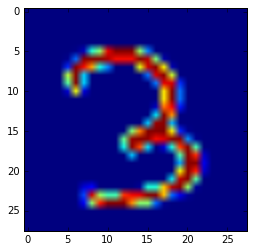

In [8]:
plt.imshow(x3t[:,12].reshape((28,28)))
plt.show()

In [9]:
def sgn(x):
    if(x<0).all():
        return -1
    else:
        return 1
    

In [10]:
def train_perceptron(X,Y, eta):
    """Calculate weight matrix using the perceptron algorithm
    
    Args:
        X (array): Contains all the training data
        Y (array): Contains the labels of the training data
    Returns:
        W (array): weights
    """
    X = np.hstack(X)
    Y = np.hstack(Y)
    num_features, num_images = X.shape
    X = np.vstack((np.ones((X.shape[1])),X))
    W = np.random.rand(num_features+1).reshape((-1,1))

    sampling = np.arange(X.shape[1])
    np.random.shuffle(sampling)

    converged = False
    iterations = 0
    n_updates = 0
    acc_per_step = []
    while converged==False and iterations < 10000:
        converged = True
        iterations += 1
        for i in sampling:
            if sgn(X[:,i]@W) != Y[i]:
                converged = False
                W = W + eta*Y[i]*X[:,i].reshape(W.shape)
                n_updates += 1
                _, acc = classify(X,Y,W,False)
                acc_per_step.append(acc)
    print(iterations)
    return W, acc_per_step
    


In [11]:
def classify(X,Y,W, data_mod):
    """Classify a dataset X,Y
    
    Args:
        X (List): List with each element containing a dataset
        Y (list): List of the labels corresponding to X
        W (array): Weights matrix to do the classification with
        data_mod: Set to true of X and Y have not been numpified
    return:
        classification_result (list): result of the classifier W
        accuracy (bool): accuracy of the classifier W
    """
    if data_mod == True:
        X = np.hstack(X)
        Y = np.hstack(Y)
        X = np.vstack((np.ones((X.shape[1])),X))
        
    num_images = X.shape[1]
    classification_result = np.zeros(num_images)
    #sampling = np.arange(X.shape[1])
    #np.random.shuffle(sampling)
    #for i in sampling:
       # classification_result[i] = sgn(X[:,i]@W) 
    a=np.dot(X.T,W)
    classification_result = 2*(a>=0)-1
    
    accuracy = np.sum(classification_result.ravel() == Y)/num_images

    return classification_result.ravel(), accuracy

In [12]:
a=np.random.rand(10)*2-1
y = 2*(a>=0)-1
x = np.arange(9).reshape((3,3))
w=np.arange(3)

print(x.T@w,np.dot(x.T,w),x,w)

[15 18 21] [15 18 21] [[0 1 2]
 [3 4 5]
 [6 7 8]] [0 1 2]


In [13]:
N=50
X,Y,Xt,Yt = data_preparation(N)
eta = 0.1
W, accuracy = train_perceptron(X,Y,eta)

4


In [14]:

s = classify(Xt,Yt,W, True)
print(s[1])

0.91


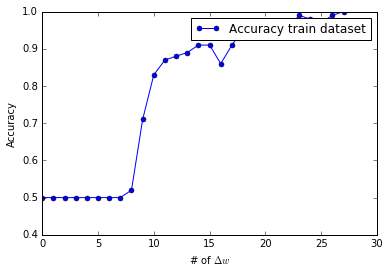

In [15]:

    
plt.plot(accuracy,'o',markersize=5,linestyle='-',label = 'Accuracy train dataset')
plt.xlabel('# of $\Delta w$')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
accuracies = []

data_sizes = [10,50,150,300,500]
learning_rates = [0.001,0.01,0.1,1,5,10,100,1000]
Weights = np.zeros((785,len(data_sizes)*len(learning_rates)))
for i,N in enumerate(data_sizes[:]):
    X, Y, Xt, Yt = data_preparation(N)
    for j,eta in enumerate(learning_rates[:]):
        W, accuracy = train_perceptron(X,Y,eta)
        accuracies.append(accuracy)
        Weights[:,i*len(learning_rates)+j]=W.ravel()

134
18
3
2
2
3
2
2
202
14
6
3
2
2
4
3
180
30
9
6
4
9
6
7
231
35
19
12
11
23
13
12
482
45
16
19
19
15
18
18


In [17]:
import pickle
#save data
'''
with open('weights', 'wb') as fp:
    pickle.dump(accuracies, fp)
with open('accuracies', 'wb') as fp:
    pickle.dump(accuracies, fp)
'''

"\nwith open('weights', 'wb') as fp:\n    pickle.dump(accuracies, fp)\nwith open('accuracies', 'wb') as fp:\n    pickle.dump(accuracies, fp)\n"

In [18]:


with open ('accuracies', 'rb') as fp:
    accuracies = pickle.load(fp)
    

with open ('weights', 'rb') as fp:
    Weights = pickle.load(fp)

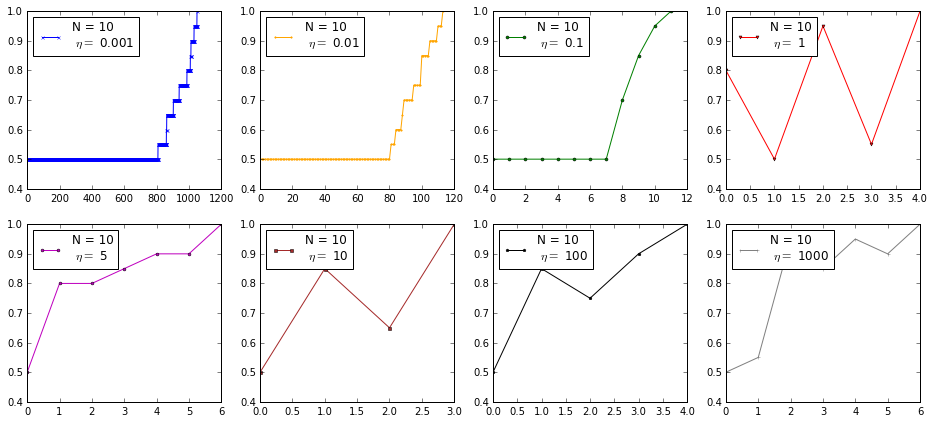

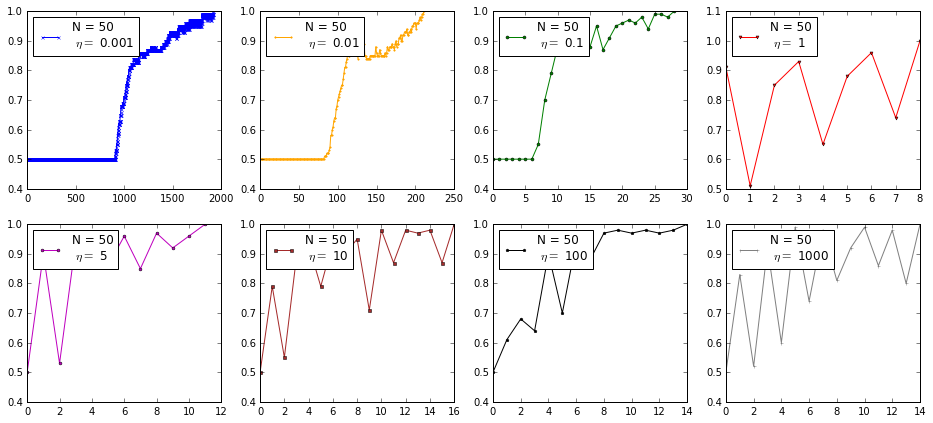

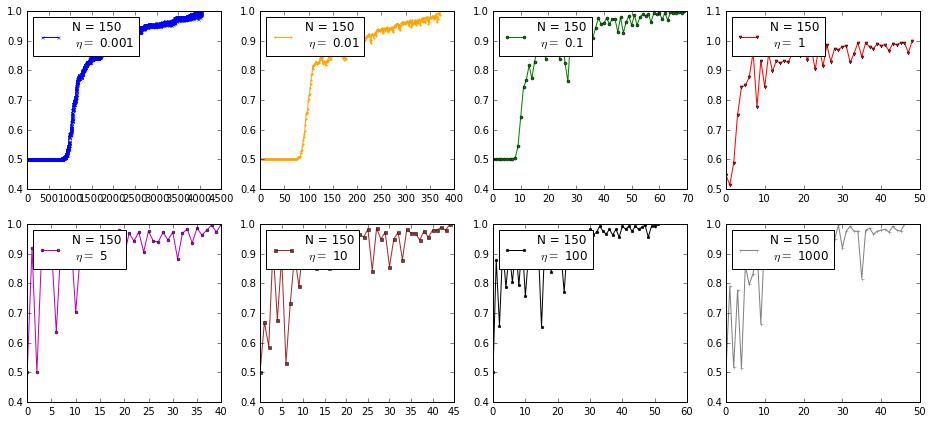

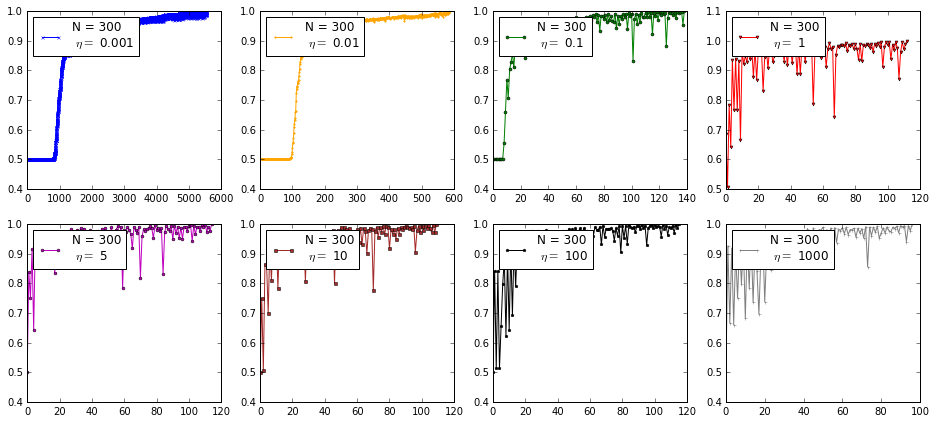

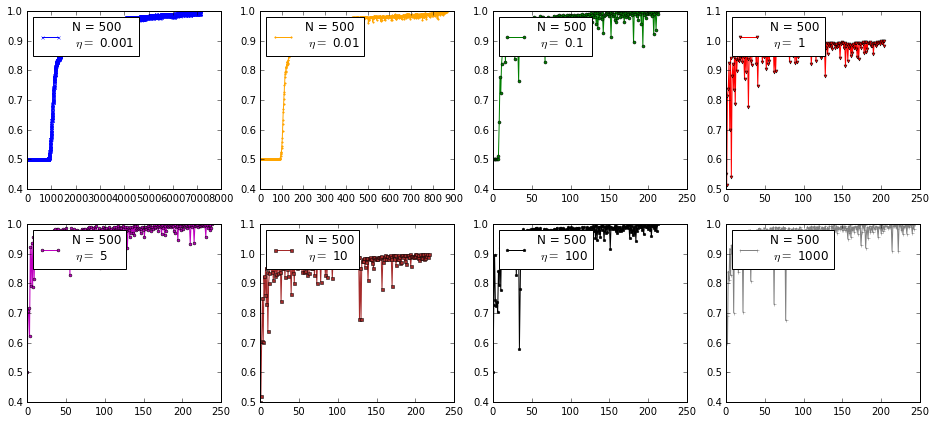

In [19]:
markers = ['x', '.','o','v','8','s','p','+']
colors = ['b','orange','g','r','m','brown','black','grey']

for i, N in enumerate(data_sizes):
    plt.figure()
    plt.subplots(nrows=2,ncols=4,figsize=(16,7))
    for j, eta in enumerate(learning_rates):
        plt.subplot(241+j)
        plt.plot(accuracies[i*len(learning_rates)+j], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = 'N = %s\n $\eta=$ %s' %(N,eta))
        plt.legend(loc = 'upper left')
    plt.show()


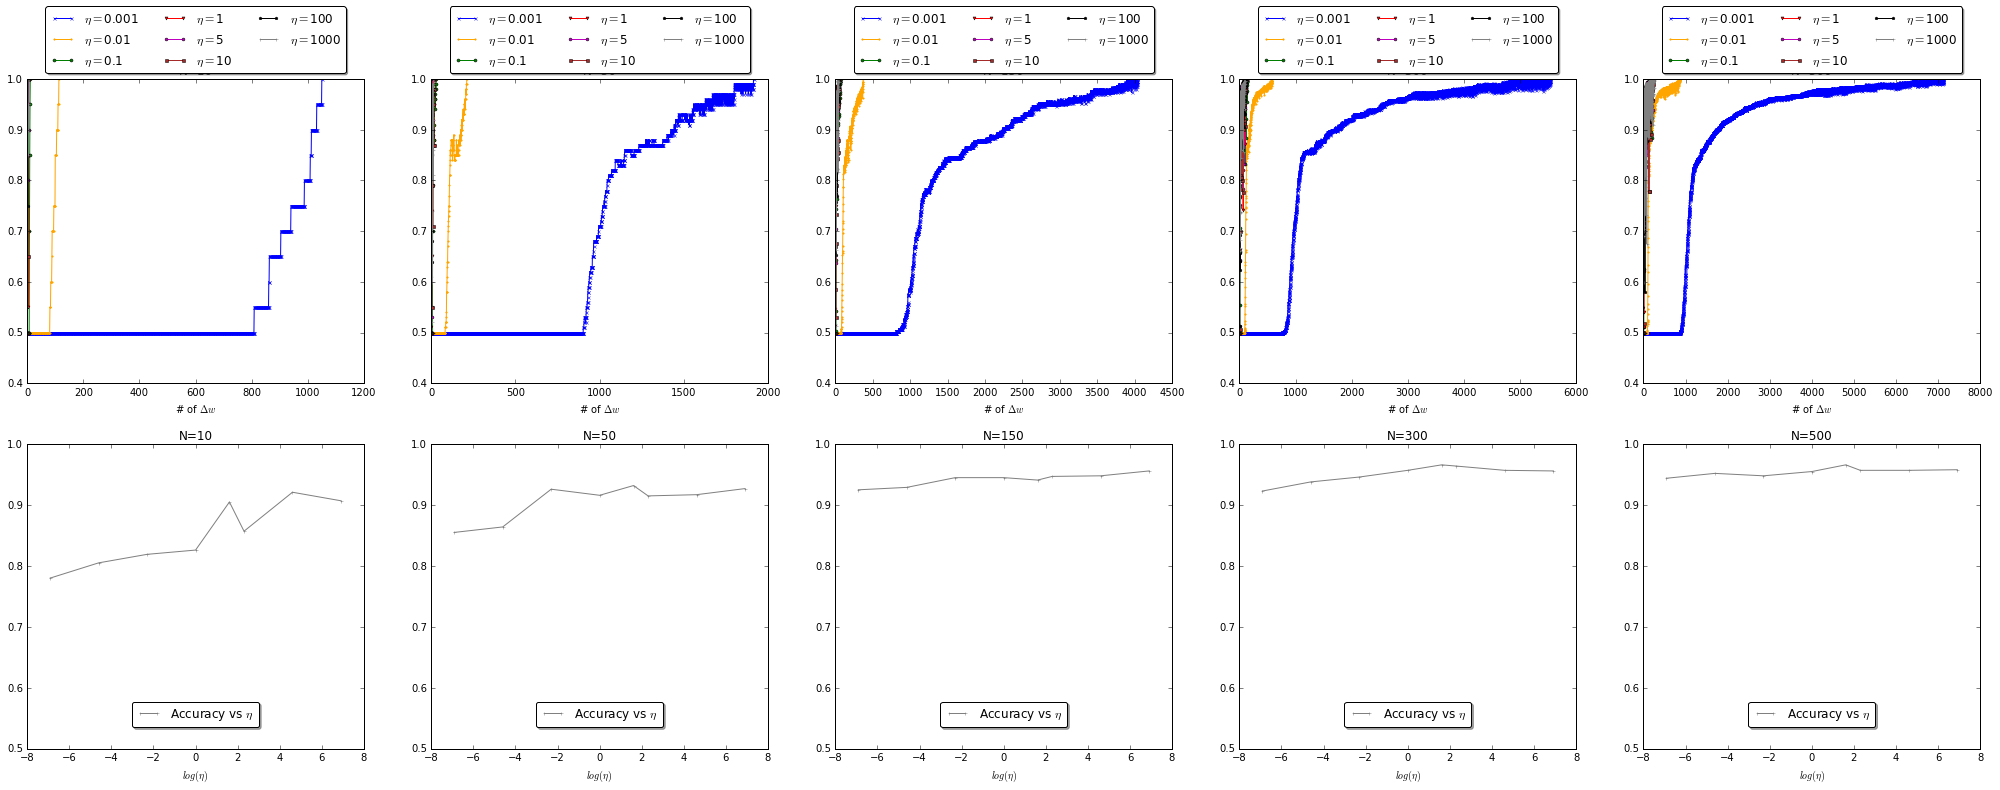

In [20]:


accuracies_test =[]

plt.figure()
plt.subplots(nrows=2,ncols=5,figsize=(35,12))
for i , N in enumerate(data_sizes):
    plt.subplot(2,5,i+1)
    for j, eta in enumerate(learning_rates):
        _, acc = classify(Xt,Yt,Weights[:,i*len(learning_rates)+j],data_mod=True)
        accuracies_test.append(acc)
        
        
        plt.plot(accuracies[i*len(learning_rates)+j], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = '$\eta=$%s' %eta)
        plt.title('N=%s' %N)
    plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1), fancybox=True, shadow=True)
    plt.xlabel('# of $\Delta w$')
    plt.subplot(2,5,i+len(data_sizes)+1)
    plt.plot(np.log(learning_rates),accuracies_test[i*len(learning_rates):(i+1)*len(learning_rates)], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = 'Accuracy vs $\eta$')
    plt.xlabel('$log(\eta)$')
    plt.ylim([0.5,1])
    plt.title('N=%s' %N)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.05), fancybox=True, shadow=True)
plt.show()    

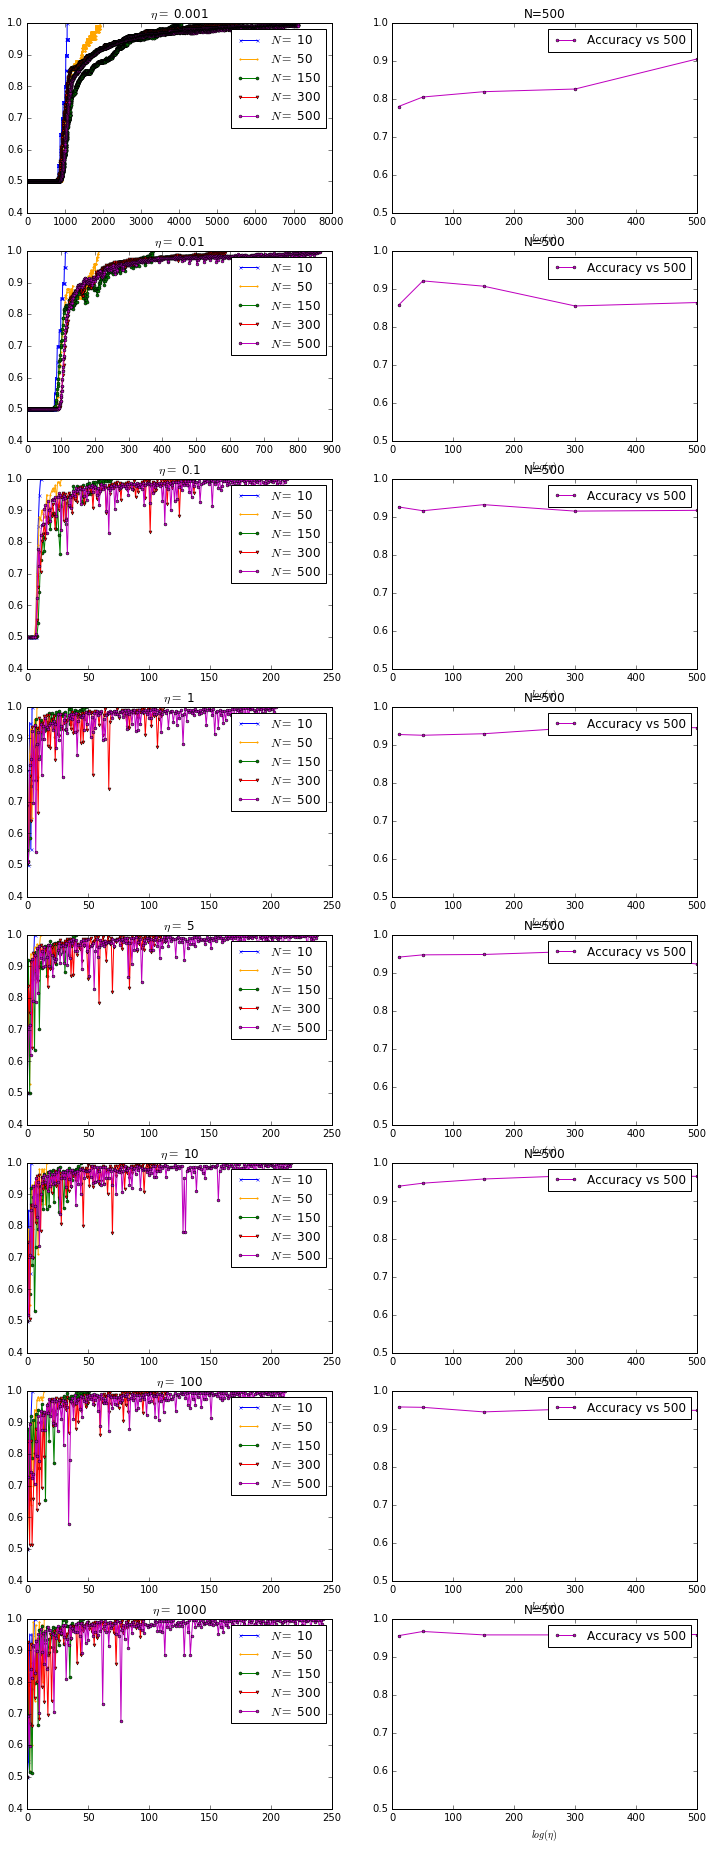

In [21]:
markers = ['x', '.','o','v','8','s','P','+']
colors = ['b','orange','g','r','m','brown','black','grey']
plt.figure()

plt.subplots(nrows=8,ncols=2,figsize=(12,32))
for i , eta in enumerate(learning_rates):
    plt.subplot(8,2,(2*i+1))
    
    for j, N in enumerate(data_sizes):
        _, acc = classify(Xt,Yt,Weights[:,i+j*len(learning_rates)],data_mod=True)
        plt.plot(accuracies[i+j*len(learning_rates)], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = '$N=$ %s' %N)
    plt.legend()
    plt.title('$\eta =$ %s' %eta )
    plt.subplot(8,2,(i+1)*2)
    plt.plot(data_sizes,accuracies_test[i*len(data_sizes):(i+1)*len(data_sizes)], marker=markers[j],markersize=3, color=colors[j],linestyle='-', label = 'Accuracy vs %s' %N)
    plt.xlabel('$log(\eta)$')
    plt.ylim([0.5,1])
    plt.title('N=%s' %N)
    plt.legend()
plt.show()    

In [22]:

def data_prep_train(N,numbers = [0,1,2,3,4,5,6,7,8,9]):
    xdata = []
    ydata = []
    for i in numbers:
        n = x_all[:,np.where(train_labels==i)[0]][:,:N]
        n_label = train_labels.ravel()[np.where(train_labels==i)[0]][:N]
        xdata.append(n)
        ydata.append(n_label)
    xdata = np.hstack(xdata)
    ydata = np.hstack(ydata)
    xdata = np.vstack((np.ones(xdata.shape[1]),xdata))
    
    return xdata, ydata
def data_prep_test(N,numbers = [0,1,2,3,4,5,6,7,8,9]):
    xdata = []
    ydata = []
    for i in numbers:
        n = x_all_test[:,np.where(test_labels==i)[0]][:,:N]
        n_label = test_labels.ravel()[np.where(test_labels==i)[0]][:N]
        xdata.append(n)
        ydata.append(n_label)
    xdata = np.hstack(xdata)
    ydata = np.hstack(ydata)
    xdata = np.vstack((np.ones(xdata.shape[1]),xdata))
    return xdata, ydata

In [27]:

#X,Y = data_prep_train(100,[0,1,2,3,4,5,6,7,8,9])
#Xt, Yt = data_prep_test(80,np.arange(10))
#Xt = np.hstack(Xt);Yt = np.hstack(Yt);Xt=np.vstack((np.ones(Xt.shape[1]),Xt))
#eta = 5

def train_grad_desc(numbers,X,Y,eta):
    """Calculate weight matrix using the gradient descent update rule

    Args:
        X (array): Contains all the training data
        Y (array): Contains the labels of the training data
    Returns:
        W (array): weights
    """
    num_weights = len(numbers)
    #X = np.hstack(X)
    #Y = np.hstack(Y)

    num_images = X.shape[1]

    #X = np.vstack((np.ones(X.shape[1]),X))

    num_features = X.shape[0]

    w = np.random.rand(num_features,num_weights)
    sampling = np.arange(num_images)
    np.random.shuffle(sampling)

    converged = False
    iterations = 0
    n_updates = 0
    acc_per_step = []
    n_epochs = 51
    c_train=np.zeros(n_epochs-1);
    c_test = np.zeros(n_epochs-1);
    Xt, Yt = data_prep_test(80,[3,7])
    
    for epochs in range(0,n_epochs):
        iterations +=1

        for i in sampling:
            x = X[:,i] #pick random training image
            c = np.int(Y[i]) #the label corresponding to the training image x

            a = np.dot(x,w)
            y = 2*(a>=0)-1
            for j,k in enumerate(numbers):
                delta = 2*(k==c)-1-y[j]
                if delta!=0:
                    w[:,j]=w.T[j]+eta*delta*x;

        correct_train=0;
        for i in range(0, num_images):
            x=X[:,i];
            c=np.int(Y[i]);
            a=np.dot(x,w)
            #y=2*(a>=0)-1;
            if(numbers[np.argmax(a)]==c):
                correct_train += 1;
        c_train[epochs-1]=correct_train;


        correct_test=0;
        for i in range(0, Xt.shape[1]):
            x=Xt[:,i]
            c=np.int(Yt[i]);
            a=np.dot(x,w)
            #y=2*(a>=0)-1;
            if(numbers[np.argmax(a)]==c):
                correct_test=correct_test+1;
        c_test[epochs-1]=correct_test;
    return c_train/num_images,c_test/Xt.shape[1], w
#print(x.shape, W.shape)
#return w, acc_per_step

#result = train_grad_desc(X,Y,0.01)


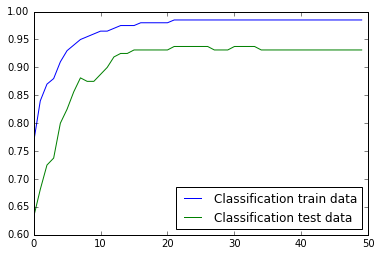

In [28]:
numbers = [0,1,2,3,4,5,6,7,8,9]
numbers = [3,7]
N = 100# Size of train data set (# of images)
X,Y = data_prep_train(N,numbers)
c_train,c_test, w = train_grad_desc(numbers,X,Y,0.001)

plt.plot(c_train,label='Classification train data')
plt.plot(c_test, label='Classification test data')
plt.legend(loc = 'lower right')
plt.show()